# Text Analysis Exercise
The objective of this exercise is to process and analyze a dataset of Yelp reviews classified by sentiment (positive or negative) (`data.csv`).

In [2]:
# Install stopwords package
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# Load libraries
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# Load the dataset and display the first five rows
data = pd.read_csv('data.csv')
data.head()

,text,class
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
data.shape

(997, 2)

**Task 01 (of 10): Convert the text to lowercase.**

In [6]:
data['text'] = [d.lower() for d in data.text]
data.head()

,text,class
0,wow... loved this place.,1
1,crust is not good.,0
2,not tasty and the texture was just nasty.,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


**Task 02 (of 10): Remove punctuation and special characters (that is, every character that is not a letter, a digit, or a whitespace) from the text.**
_Hint:_ Use regular expressions and the `str.replace()` function.

In [7]:
data['text'] = [re.sub(r'[^\w\s]', '', d) for d in data.text]
data.head()

,text,class
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [8]:
# Print list of stop words
stop_list = stopwords.words('english')
print(stop_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
# Remove stop words from text
data['text'] = data['text'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_list]))
data.head()

,text,class
0,wow loved place,1
1,crust good,0
2,tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great prices,1


**Question 01 (of 05): What are the disadvantages of removing these stop words from the text?**

**Answer:** Some of the important words like "not" gets removed which could be the deciding factor for whether a comment is positive or not. So, if the context is getting altered, then removal of stop words is not a good idea.

**Task 03 (of 10): Stem the text.** _Hint:_ Use the `stem()` function. For a similar lambda function, see the code for removing stop words above.

In [10]:
st = PorterStemmer()
data['text'] = data['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
data.head()

,text,class
0,wow love place,1
1,crust good,0
2,tasti textur nasti,0
3,stop late may bank holiday rick steve recommen...,1
4,select menu great price,1


**Task 04 (of 10): Split the text into tokens.** _Hint:_ Use the `split()` function.

In [11]:
data['tokens'] = data['text'].apply(lambda x: x.split())
data.head()

,text,class,tokens
0,wow love place,1,"[wow, love, place]"
1,crust good,0,"[crust, good]"
2,tasti textur nasti,0,"[tasti, textur, nasti]"
3,stop late may bank holiday rick steve recommen...,1,"[stop, late, may, bank, holiday, rick, steve, ..."
4,select menu great price,1,"[select, menu, great, price]"


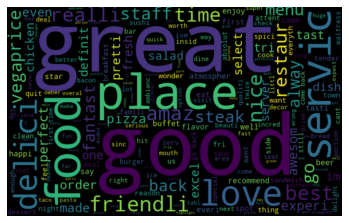

In [12]:
# Create word cloud using text from positive reviews
list_words_positive = []
for index, row in data.iterrows():
    if row['class'] == 1:
        list_words_positive.extend(row['tokens'])
all_words = ' '.join(list_words_positive)
wordcloud = WordCloud(width = 800, height = 500).generate(all_words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Task 05 (of 10): Create a word cloud using the text from negative reviews.**

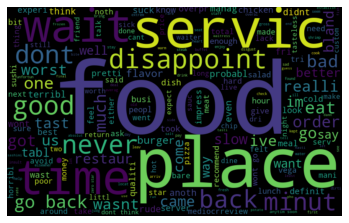

In [13]:
list_words_negative = []
for index, row in data.iterrows():
    if row['class'] == 0:
        list_words_negative.extend(row['tokens'])
all_words = ' '.join(list_words_negative)
wordcloud = WordCloud(width = 800, height = 500).generate(all_words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Question 02 (of 05): What can you conclude from the word clouds?**

**Answer:** For the good reviews, we can observe that the majority words are good, great, delici, best, love, friendli. Whereas, for the bad reviews, the words are disappoint, bad, worst, suck, rude, bland. The use of these negative words is not very prevalent in the negative reviews because a lot of reviews would be "not good" instead of "bad" which causes the word frequency to get biased.

**Task 06 (of 10): Convert the text into a matrix of word counts.**
_Hint:_ Use `sklearn`'s `CountVectorizer` object.

In [14]:
vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(data['text'])

**Task 07 (of 10): Print all the words in the word count matrix.**

In [15]:
print(vectorizer.get_feature_names())

['10', '100', '1199', '12', '15', '15lb', '17', '1979', '20', '2007', '23', '30', '34th', '35', '40', '400', '40min', '45', '70', '785', '90', 'absolut', 'absolutley', 'accid', 'accommod', 'accomod', 'account', 'ach', 'acknowledg', 'across', 'actual', 'ad', 'afford', 'afternoon', 'ago', 'ahead', 'airlin', 'airport', 'ala', 'albondiga', 'allergi', 'almond', 'almost', 'alon', 'also', 'although', 'alway', 'amaz', 'amazingrg', 'ambianc', 'ambienc', 'amount', 'ampl', 'andddd', 'angri', 'anoth', 'anticip', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'apart', 'apolog', 'app', 'appal', 'appar', 'appeal', 'appet', 'appetit', 'appl', 'approv', 'area', 'arent', 'arepa', 'aria', 'around', 'array', 'arriv', 'articl', 'ask', 'assur', 'ate', 'atmospher', 'atmosphere1', 'atroci', 'attach', 'attack', 'attent', 'attitud', 'auju', 'authent', 'averag', 'avocado', 'avoid', 'aw', 'away', 'awesom', 'awkward', 'awkwardli', 'ayc', 'az', 'baba', 'babi', 'bachi', 'back', 'bacon', 'bad', 'bagel', 'bakeri', 'b

In [16]:
print(len(vectorizer.get_feature_names()))

1629


**Question 03 (of 05): How many different words are there in the dataset? List some examples.**

**Answer:** They are a total of `1629` words in the matrix. Some of them are 10, 100, across, actual,ago, beef, etc.

**Task 08 (of 10): Print the first row and the first column of the word count matrix.**

In [17]:
print(count_matrix.toarray()[0])
print()
print(count_matrix.toarray()[:,0])

[0 0 0 ... 0 0 0]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0

In [18]:
len(data['tokens'][0])

3

In [19]:
count = 0
for d in data['tokens']:
  if '10' in d:
    count += 1
print(count)

5


**Question 04 (of 05): How many words are there in the first review? How many reviews contain the word '10'?**

**Answer:** There are `3` tokens in the first review which was stemmed and without stop words. There are `5` reviews which containt the word 10.

**Task 09 (of 10): Convert the text into a term frequency-inverse document frequency matrix.**
_Hint:_ Use `sklearn`'s `TfidfVectorizer` object.

In [20]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['text'])

**Task 10 (of 10): Print the first row and the first column of the term frequency-inverse document frequency matrix.**

In [21]:
print(tfidf_matrix.toarray()[0])
print()
print(tfidf_matrix.toarray()[:,0])

[0. 0. 0. ... 0. 0. 0.]

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.34289168
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         

In [22]:
tfidf_matrix.toarray()[59][0]

0.3428916833970035

**Question 05 (of 05): What is the term frequency-inverse document frequency of the word '10' in the 60th review?**

**Answer:** The tfidf of word '10' in the 60th review is `0.3428916833970035`